In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# mtalbert_data = pd.read_csv('../Data/soil data/AcrossAucklandRainfallStation/MtAlbert_Data_15mins_SoilProfile.csv', parse_dates=['Timestamp (UTC+12:00)'])
# mtalbert_data

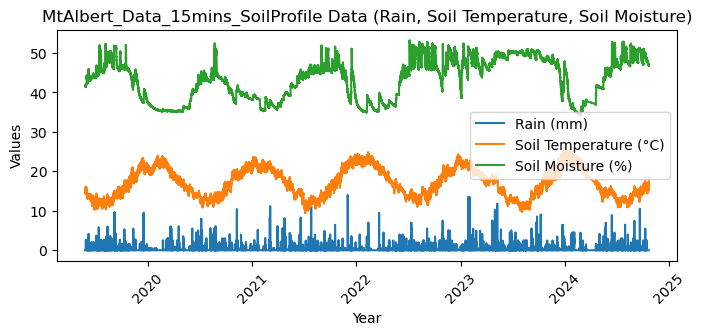

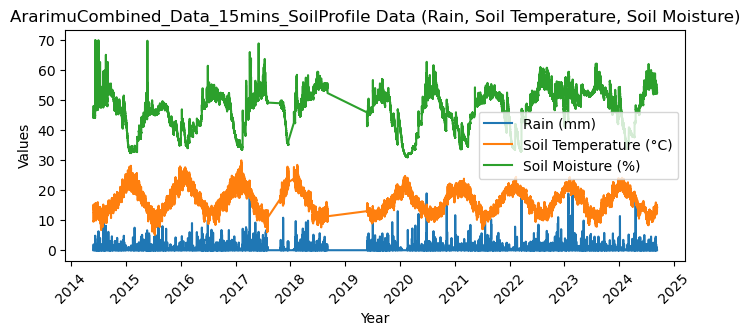

: 

In [3]:
import matplotlib.dates as mdates
import os

station_files = [
    '../Data/soil data/AcrossAucklandRainfallStation/MtAlbert_Data_15mins_SoilProfile.csv',
    '../Data/soil data/AcrossAucklandRainfallStation/ArarimuCombined_Data_15mins_SoilProfile.csv',
    '../Data/soil data/AcrossAucklandRainfallStation/awhituCombined_Data_15mins_SoilProfile.csv',
    '../Data/soil data/AcrossAucklandRainfallStation/Kaipara_Data_15mins_SoilProfile.csv',
    '../Data/soil data/AcrossAucklandRainfallStation/tomarataCombined_Data_15mins_SoilProfile.csv',
    '../Data/soil data/AcrossAucklandRainfallStation/whangamarieCombined_Data_15mins_SoilProfile.csv'

]

for station_file in station_files:
    if os.path.exists(station_file):
        # Load data, parse datetime column
        station_data = pd.read_csv(station_file, parse_dates=['Timestamp (UTC+12:00)'])
        
        # Set 'Timestamp (UTC+12:00)' as the index for easier plotting of dates
        station_data.set_index('Timestamp (UTC+12:00)', inplace=True)
        
        # Plot each parameter
        plt.figure(figsize=(8, 3))
        plt.plot(station_data.index, station_data['Rain(mm)'], label='Rain (mm)')
        plt.plot(station_data.index, station_data['SoilTemp(c)'], label='Soil Temperature (°C)')
        plt.plot(station_data.index, station_data['SoilMoisture(%)'], label='Soil Moisture (%)')

        # Set x-ticks to show each year and rotate labels by 45 degrees
        plt.gca().xaxis.set_major_locator(mdates.YearLocator())
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        plt.xticks(rotation=45)
        
        # Add labels, legend, and title
        plt.xlabel("Year")
        plt.ylabel("Values")
        station_name = os.path.basename(station_file).replace('.csv', '')  # Extract station name
        plt.title(f"{station_name} Data (Rain, Soil Temperature, Soil Moisture)")
        plt.legend()
        plt.show()
    else:
        print(f"File not found: {station_file}")

Normalize data by station to make them comparable:



In [ ]:
from sklearn.preprocessing import StandardScaler

# Apply scaling (fit on each station separately if needed)
scaler = StandardScaler()
for station_file in station_files:
    station_data[['Rain(mm)', 'SoilTemp(c)', 'SoilMoisture(%)']] = scaler.fit_transform(
        station_data[['Rain(mm)', 'SoilTemp(c)', 'SoilMoisture(%)']]
    )

In [ ]:
station_data.columns

Index(['Rain(mm)', 'SoilTemp(c)', 'SoilMoisture(%)', 'Location', 'Soil order',
       'NZ Soil Classification', 'Mean annual rainfall (mm) ',
       'Pastoral land use', 'Brackish Estuarine', 'Coastal Forest',
       'Dune Vegetation', 'Freshwater Wetland', 'Kauri Forest',
       'Volcanic Boulderfield', 'Podocarp/Broadleaf & Kauri', 'Shrubland',
       'Unclassified', 'Ecological District'],
      dtype='object')

In [ ]:
columns_to_encode = ['Location','Soil order', 'NZ Soil Classification', 'Pastoral land use', 'Ecological District']
encoded_station_data = []

for station_file in station_files:
    station_data = pd.read_csv(station_file, parse_dates=['Timestamp (UTC+12:00)'])
    station_data.set_index('Timestamp (UTC+12:00)', inplace=True)
    # Use the pd.get_dummies() function to perform one-hot encoding
    station_data_encoded  = pd.get_dummies(station_data, columns=columns_to_encode)
    encoded_station_data.append(station_data_encoded)
    
encoded_station_data

[                       Rain(mm)  SoilTemp(c)  SoilMoisture(%)  \
 Timestamp (UTC+12:00)                                           
 2019-05-26 05:00:00         0.0       14.492        41.861333   
 2019-05-26 05:15:00         0.0       14.400        41.586000   
 2019-05-26 05:30:00         0.0       14.400        41.591000   
 2019-05-26 05:45:00         0.0       14.400        41.590000   
 2019-05-26 06:00:00         0.0       14.400        41.588000   
 ...                         ...          ...              ...   
 2024-10-21 19:00:00         0.0       18.391        46.736000   
 2024-10-21 19:15:00         0.0       18.313        46.861000   
 2024-10-21 19:30:00         0.0       18.316        46.861000   
 2024-10-21 19:45:00         0.0       18.313        46.866000   
 2024-10-21 20:00:00         0.0       18.316        46.903000   
 
                        Mean annual rainfall (mm)   Brackish Estuarine  \
 Timestamp (UTC+12:00)                                            

In [ ]:
combined_data = pd.concat(encoded_station_data, axis=0)

start_date = '2019-05-28'
end_date = '2024-09-09'
combined_data = combined_data[(combined_data.index >= start_date) & (combined_data.index <= end_date)]
combined_data.head(100)


,Rain(mm),SoilTemp(c),SoilMoisture(%),Mean annual rainfall (mm),Brackish Estuarine,Coastal Forest,Dune Vegetation,Freshwater Wetland,Kauri Forest,Volcanic Boulderfield,...,Soil order_Brown,NZ Soil Classification_Red Hill sandy loam,Ecological District_Kaipara,Location_Tomarata at Briens Farm,NZ Soil Classification_Perch Gley or Densipan Ultic,Pastoral land use_Dairy,Ecological District_Rodney,Location_Whangamaire @ Culvert,Pastoral land use_Lifestyle block,Ecological District_Manukau
Timestamp (UTC+12:00),,,,,,,,,,,,,,,,,,,,,
2019-05-28 00:00:00,0.0,15.7,41.475,1414,2057,309,0,73,359,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-28 00:15:00,0.0,15.7,41.475,1415,2057,309,0,73,359,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-28 00:30:00,0.0,15.7,41.473,1416,2057,309,0,73,359,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-28 00:45:00,0.0,15.7,41.473,1417,2057,309,0,73,359,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-28 01:00:00,0.0,15.6,41.545,1418,2057,309,0,73,359,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-28 23:45:00,0.0,16.1,41.881,1509,2057,309,0,73,359,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-29 00:00:00,0.0,16.1,41.881,1510,2057,309,0,73,359,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-29 00:15:00,0.0,16.0,41.881,1511,2057,309,0,73,359,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
combined_data

,Rain(mm),SoilTemp(c),SoilMoisture(%),Mean annual rainfall (mm),Brackish Estuarine,Coastal Forest,Dune Vegetation,Freshwater Wetland,Kauri Forest,Volcanic Boulderfield,...,Soil order_Brown,NZ Soil Classification_Red Hill sandy loam,Ecological District_Kaipara,Location_Tomarata at Briens Farm,NZ Soil Classification_Perch Gley or Densipan Ultic,Pastoral land use_Dairy,Ecological District_Rodney,Location_Whangamaire @ Culvert,Pastoral land use_Lifestyle block,Ecological District_Manukau
Timestamp (UTC+12:00),,,,,,,,,,,,,,,,,,,,,
2019-05-28 00:00:00,0.0,15.700,41.475,1414,2057,309,0,73,359,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-28 00:15:00,0.0,15.700,41.475,1415,2057,309,0,73,359,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-28 00:30:00,0.0,15.700,41.473,1416,2057,309,0,73,359,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-28 00:45:00,0.0,15.700,41.473,1417,2057,309,0,73,359,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-28 01:00:00,0.0,15.600,41.545,1418,2057,309,0,73,359,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-08 23:00:00,0.0,16.495,48.626,279795,1096,13,0,105,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True
2024-09-08 23:15:00,0.0,16.498,48.515,279796,1096,13,0,105,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True
2024-09-08 23:30:00,0.0,16.498,48.515,279797,1096,13,0,105,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True


<Axes: >

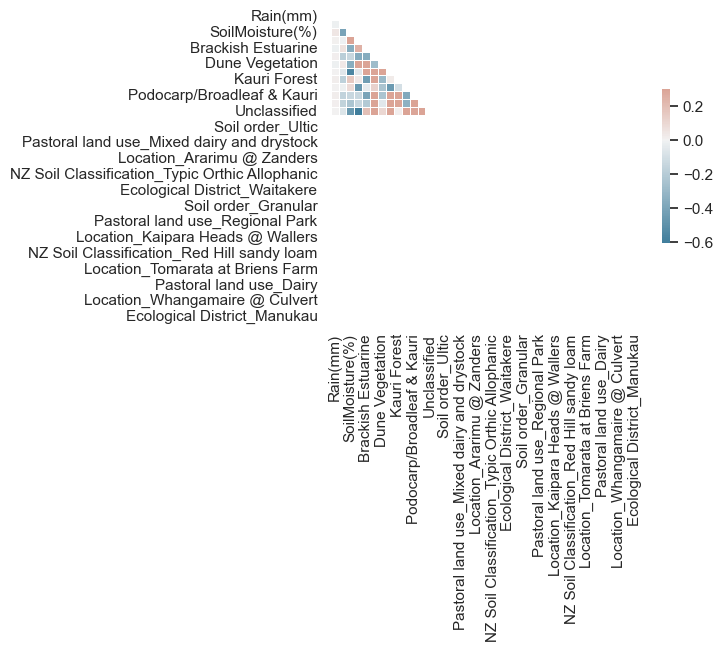

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")


# Compute the correlation matrix
corr = combined_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
print("Columns in combined_data:", combined_data.columns.tolist())


Columns in combined_data: ['Rain(mm)', 'SoilTemp(c)', 'SoilMoisture(%)', 'Mean annual rainfall (mm) ', 'Brackish Estuarine', 'Coastal Forest', 'Dune Vegetation', 'Freshwater Wetland', 'Kauri Forest', 'Volcanic Boulderfield', 'Podocarp/Broadleaf & Kauri', 'Shrubland', 'Unclassified', 'Location_Mt Albert Grammer rainfall', 'Soil order_Ultic', 'NZ Soil Classification_Mottled Yellow Ultic', 'Pastoral land use_Mixed dairy and drystock', 'Ecological District_Tamaki', 'Location_Ararimu @ Zanders', 'Soil order_Allophanic', 'NZ Soil Classification_Typic Orthic Allophanic', 'Pastoral land use_Drystock', 'Ecological District_Waitakere', 'Location_Awhitu @ Brook Road', 'Soil order_Granular', 'NZ Soil Classification_Typic Orthic Granular', 'Pastoral land use_Regional Park', 'Ecological District_Awhitu', 'Location_Kaipara Heads @ Wallers', 'Soil order_Brown', 'NZ Soil Classification_Red Hill sandy loam', 'Ecological District_Kaipara', 'Location_Tomarata at Briens Farm', 'NZ Soil Classification_Perch

In [ ]:
from sklearn.model_selection import train_test_split


X = combined_data.drop(columns=['Timestamp (UTC+12:00)', 'SoilMoisture(%)'])
y = combined_data[['SoilMoisture(%)']]


X, y = X.align(y, join='inner', axis=0)  # Ensures X and y align after dropping NaNs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X shape:", X.shape)
print("y shape:", y.shape)

KeyError: "['Timestamp (UTC+12:00)'] not found in axis"

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(X.dtypes)


Rain(mm)                                               float64
SoilTemp(c)                                            float64
Mean annual rainfall (mm)                                int64
Brackish Estuarine                                       int64
Coastal Forest                                           int64
Dune Vegetation                                          int64
Freshwater Wetland                                       int64
Kauri Forest                                             int64
Volcanic Boulderfield                                    int64
Podocarp/Broadleaf & Kauri                               int64
Shrubland                                                int64
Unclassified                                             int64
Location_Tomarata at Briens Farm                          bool
Soil order_Ultic                                          bool
NZ Soil Classification_Perch Gley or Densipan Ultic       bool
Pastoral land use_Dairy                                

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


c:\Users\Ying\.conda\envs\level8\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RMSE: 0.004007147258875673


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

def evaluate_model(predictions, y_test):
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = sqrt(mse)
    r2 = r2_score(y_test, predictions)

    return mae, mse, rmse, r2

rf_mae, rf_mse, rf_rmse, rf_r2 = evaluate_model(rf_predictions, y_test)

print("\nRandom Forest Testing Set Metrics:")
print(f"MAE: {rf_mae}")
print(f"MSE: {rf_mse}")
print(f"RMSE: {rf_rmse}")
print(f"R2 Score: {rf_r2}")


Random Forest Testing Set Metrics:
MAE: 0.0009939144995422505
MSE: 1.6057229154314816e-05
RMSE: 0.004007147258875673
R2 Score: 0.9999998373134527


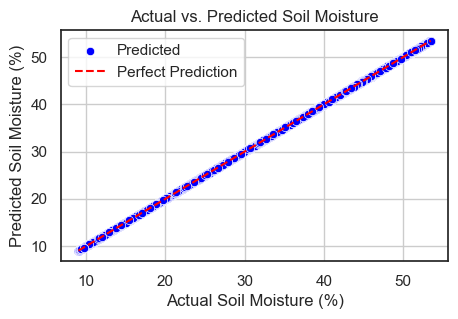

In [ ]:
y_test_df = y_test.reset_index(drop=True)
predictions_df = pd.DataFrame(rf_predictions, columns=['Predicted'])

results_df = pd.concat([y_test_df, predictions_df], axis=1)

plt.figure(figsize=(5, 3))
sns.scatterplot(x=results_df['SoilMoisture(%)'], y=results_df['Predicted'], color='blue', label='Predicted')
plt.plot([results_df['SoilMoisture(%)'].min(), results_df['SoilMoisture(%)'].max()], 
         [results_df['SoilMoisture(%)'].min(), results_df['SoilMoisture(%)'].max()], 
         color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted Soil Moisture')
plt.xlabel('Actual Soil Moisture (%)')
plt.ylabel('Predicted Soil Moisture (%)')
plt.legend()
plt.grid()
plt.show()

C:\Users\Ying\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


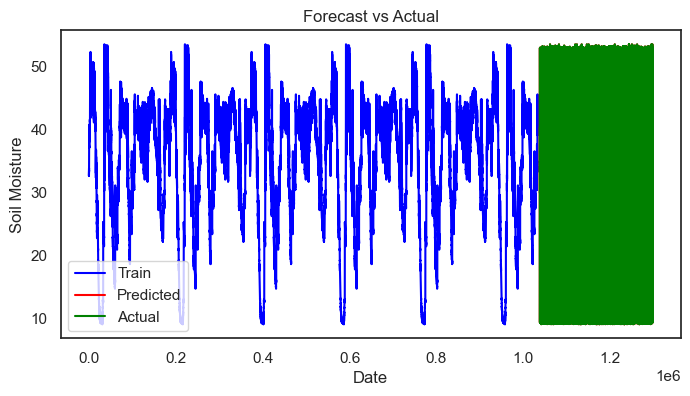

In [ ]:
y_test_df = y_test.reset_index(drop=True)
predictions_df = pd.DataFrame(rf_predictions, columns=['Predicted'])

results_df = pd.concat([y_test_df, predictions_df], axis=1)
results_df.index = combined_data.index[-len(y_test):] 

plt.figure(figsize=(8, 4))
plt.plot(combined_data['SoilMoisture(%)'][:len(X_train)], label='Train', color='blue')
plt.plot(results_df.index, results_df['Predicted'], color='red', label='Predicted')
plt.plot(results_df.index, results_df['SoilMoisture(%)'], color='green', label='Actual')
plt.title('Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Soil Moisture')
plt.legend()
plt.show()

In [ ]:
ecological_data = pd.DataFrame({
    'Ecological District': ['Kaipara', 'Rodney', 'Tamaki', 'Waitakere', 'Awhitu', 'Manukau'],
    'Brackish Estuarine': [8606, 1010, 2057, 145, 491, 1096],
    'Coastal Forest': [133, 505, 309, 421, 161, 13],
    'Dune Vegetation': [2151, 163, 0, 122, 0, 0],
    'Freshwater Wetland': [726, 858, 73, 247, 240, 105],
    'Kauri Forest': [11, 762, 359, 1675, 0, 0],
    'Volcanic Boulderfield': [0, 0, 29, 0, 0, 0],
    'Podocarp/Broadleaf & Kauri': [1059, 13089, 362, 10670, 1401, 908],
    'Shrubland': [2935, 10643, 1174, 8258, 715, 271],
    'Unclassified': [1156, 2501, 1980, 148, 0, 36]
})